In [26]:
# ----------------------------------------------------------------------
# Created: 2020-07-23
# Last-Updated: 
# Filename: hypothesis_testing.ipynb
# Author: Yinan Yu
# Description:  
# If you have any questions or comments, email yinan@chalmers.se or 
# yinan.yu@asymptotic.ai
# Note: the content of this file is subject to change
# ----------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os
plt.style.use('seaborn-darkgrid')

fig_dir = "../lectures/figs/"
data_dir = "../data/"

# Hypothesis testing

## Terminology

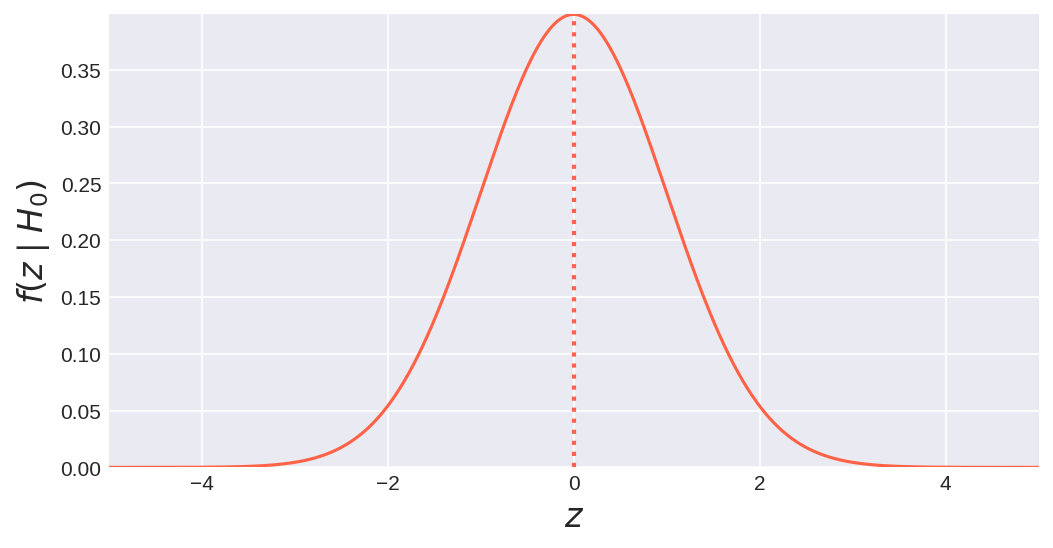

In [2]:
# Idea:
# Gaussian distribution
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(xmin, xmax, num=1000)
mean_H0 = 0
observation = 4
pdf = stats.norm.pdf(x, mean_H0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
axes.vlines(mean_H0, 0, pdf.max(), 
            color="tomato", linewidth=2, 
            linestyle="dotted")
axes.plot(x, pdf, c="tomato")

axes.set_xlabel(r"$z$", fontsize=16)
axes.set_ylabel(r"$f(z\mid H_0)$", fontsize=16)
axes.set_ylim(0, pdf.max())
axes.set_xlim(xmin, xmax);

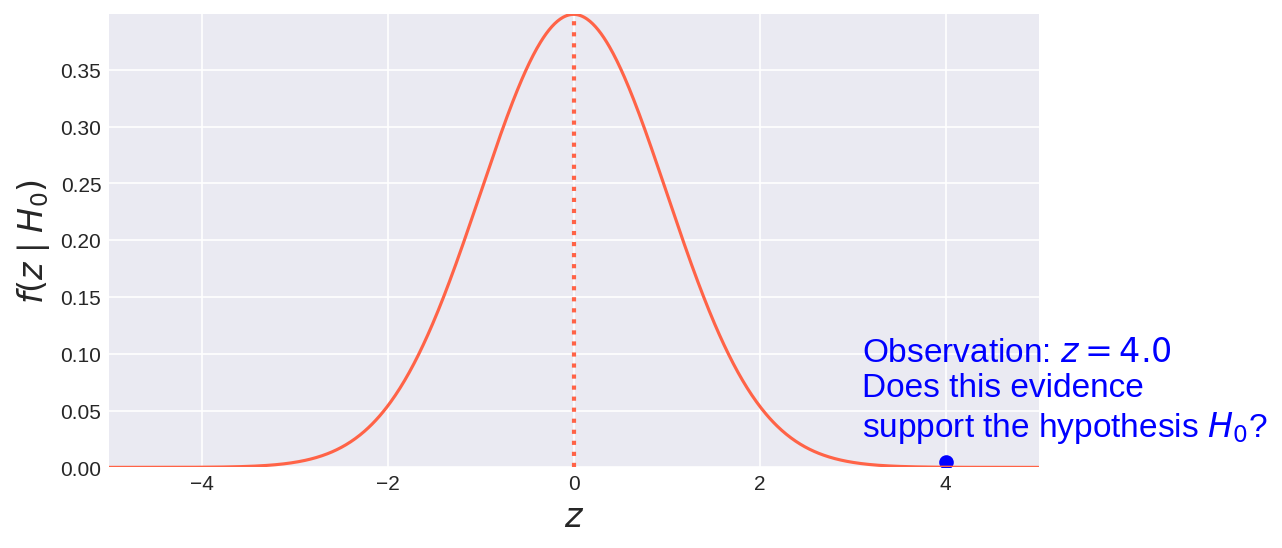

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(xmin, xmax, num=1000)
mean_H0 = 0
observation = 4
pdf = stats.norm.pdf(x, mean_H0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
axes.vlines(mean_H0, 0, pdf.max(), 
            color="tomato", linewidth=2, 
            linestyle="dotted")

axes.plot(x, pdf, c="tomato")

axes.scatter(observation, 0.005, c="blue")
axes.annotate(r"Observation: $z=%.1f$"%observation\
              +"\nDoes this evidence \nsupport the hypothesis $H_0$?", 
              (observation, 0), 
            xytext=(-40, 15), 
            textcoords="offset points", 
            color="b", fontsize=16)
axes.set_xlabel(r"$z$", fontsize=16)
axes.set_ylabel(r"$f(z\mid H_0)$", fontsize=16)
axes.set_ylim(0, pdf.max())
axes.set_xlim(xmin, xmax);

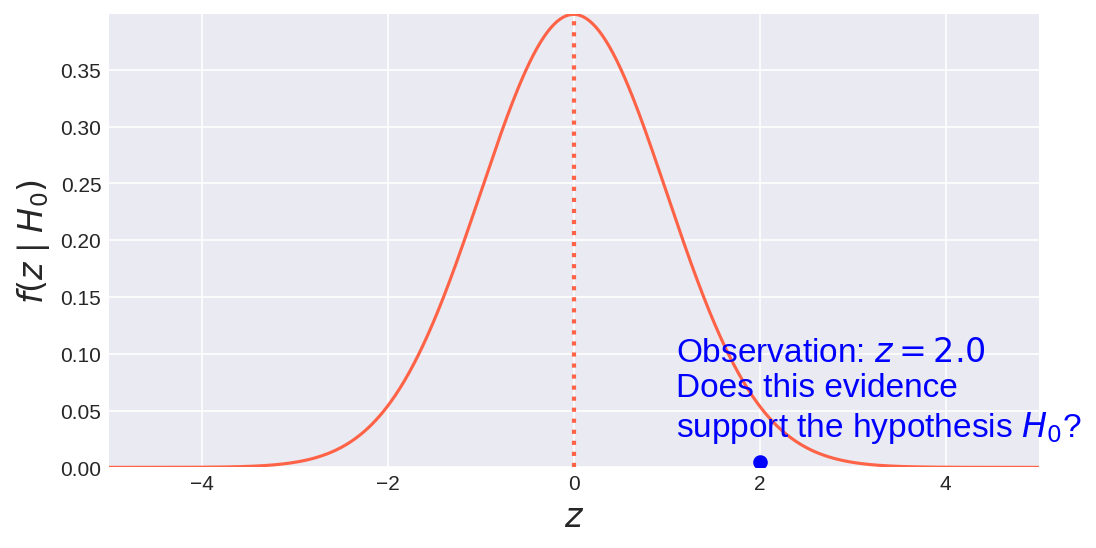

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(xmin, xmax, num=1000)
mean_H0 = 0
observation = 2
pdf = stats.norm.pdf(x, mean_H0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
axes.vlines(mean_H0, 0, pdf.max(), 
            color="tomato", linewidth=2, 
            linestyle="dotted")

axes.plot(x, pdf, c="tomato")

axes.scatter(observation, 0.005, c="blue")
axes.annotate(r"Observation: $z=%.1f$"%observation\
              +"\nDoes this evidence \nsupport the hypothesis $H_0$?", 
              (observation, 0), 
            xytext=(-40, 15), 
            textcoords="offset points", 
            color="b", fontsize=16)
axes.set_xlabel(r"$z$", fontsize=16)
axes.set_ylabel(r"$f(z\mid H_0)$", fontsize=16)
axes.set_ylim(0, pdf.max())
axes.set_xlim(xmin, xmax);

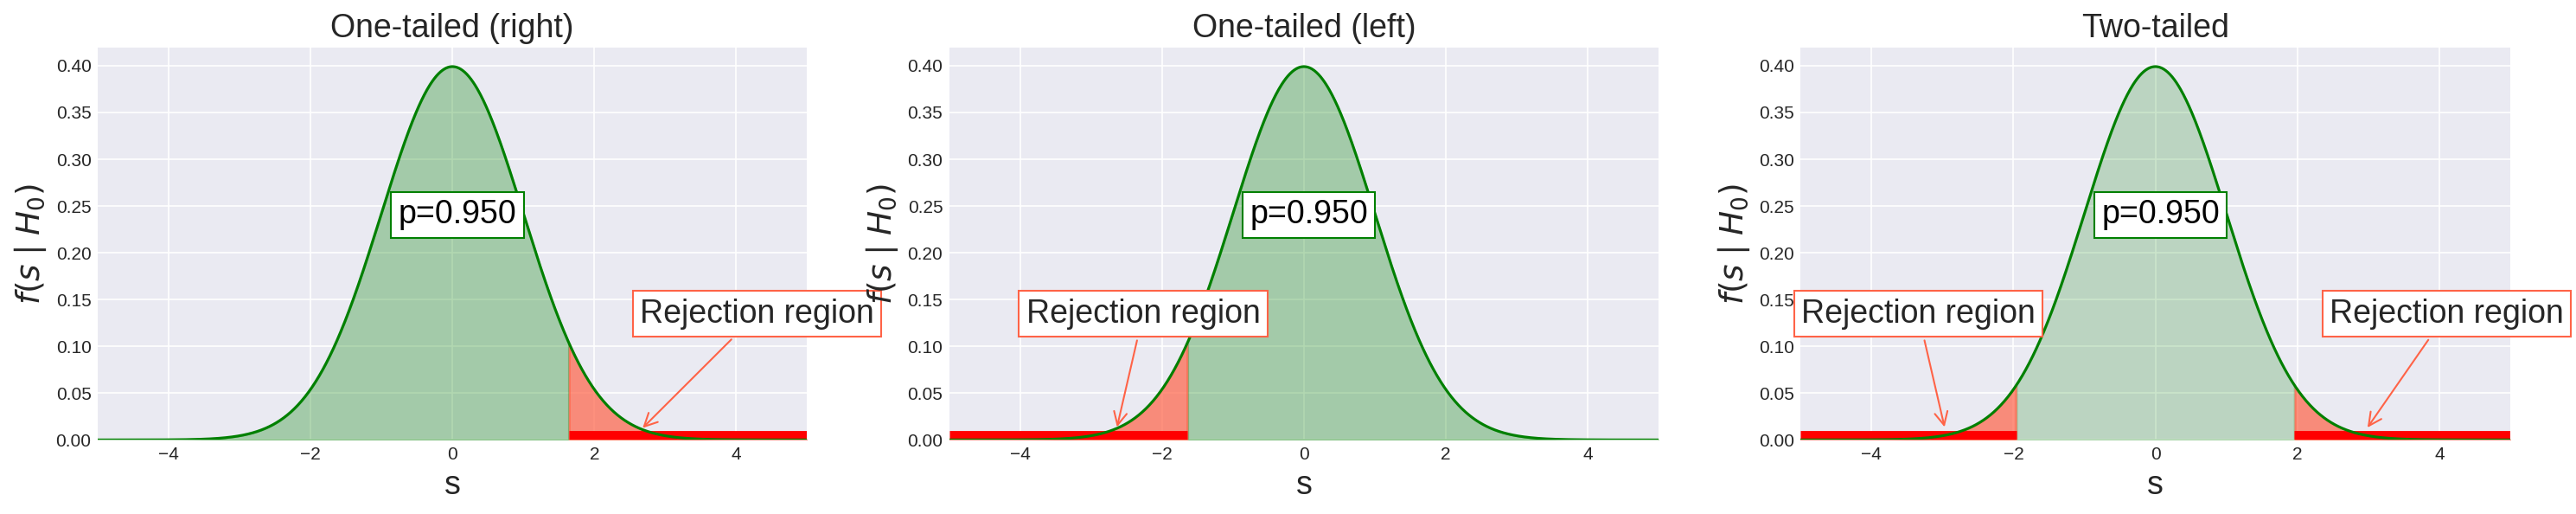

In [5]:
# Gaussian distribution
fig, axes = plt.subplots(1, 3, figsize=(24, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


p1 = 0.95
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)
axes[0].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="green", alpha=0.3)
axes[0].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="tomato", alpha=0.7)
axes[0].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="green", facecolor="white"))
axes[0].annotate("Rejection region", (q1+1, 0.01), 
                 xytext=(0, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"tomato"}, fontsize=18, 
                 bbox=dict(edgecolor="tomato", facecolor="white"))
axes[0].hlines(0, q1, xmax, color="red", linewidth=10)
axes[0].plot(x, pdf, c="green")
axes[0].set_title("One-tailed (right)", fontsize=18)
axes[0].set_xlabel("s", fontsize=18);
axes[0].set_ylabel(r"$f(s\mid H_0)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)


p0 = 0.05
pe = p0
cl = 1 - p0
q0 = stats.norm.ppf(p0, 0, 1)
axes[1].fill_between(x[(x>q0)], 
                     pdf[(x>q0)], 
                     color="green", alpha=0.3)
axes[1].fill_between(x[(x<=q0)], 
                     pdf[(x<=q0)], 
                     color="tomato", alpha=0.7)
axes[1].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="green", facecolor="white"))
axes[1].annotate("Rejection region", (q0-1, 0.01), 
                 xytext=(-50, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"tomato"}, fontsize=18, 
                 bbox=dict(edgecolor="tomato", facecolor="white"))
axes[1].hlines(0, xmin, q0, color="red", linewidth=10)
axes[1].plot(x, pdf, c="green")
axes[1].set_title("One-tailed (left)", fontsize=18)
axes[1].set_xlabel("s", fontsize=18);
axes[1].set_ylabel(r"$f(s\mid H_0)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)


p0 = 0.025
p1 = 0.975
cl = 1-2*p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
axes[2].fill_between(x[(x<=q1) & (x>=q0)], pdf[(x<=q1) & (x>=q0)], 
                     color="green", alpha=0.2)
axes[2].fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="tomato", alpha=0.7)
axes[2].fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="tomato", alpha=0.7)

axes[2].annotate("p=%.3f"%cl, (0, 0), 
            xytext=(-30, 120), 
            textcoords="offset points", 
            color="k", fontsize=18, bbox=dict(edgecolor="green", 
                                              facecolor="white"))

axes[2].annotate("Rejection region", (q1+1, 0.01), 
                 xytext=(-20, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"tomato"}, fontsize=18, 
                 bbox=dict(edgecolor="tomato", facecolor="white"))
axes[2].annotate("Rejection region", (q0-1, 0.01), 
                 xytext=(-80, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"tomato"}, fontsize=18,
                bbox=dict(edgecolor="tomato", facecolor="white"))
axes[2].plot(x, pdf, c="green")
axes[2].set_title("Two-tailed", fontsize=18)
axes[2].set_xlabel("s", fontsize=18)
axes[2].hlines(0, q1, xmax, color="red", linewidth=10)
axes[2].hlines(0, xmin, q0, color="red", linewidth=10)
axes[2].set_xlim(xmin, xmax)
axes[2].set_ylabel(r"$f(s\mid H_0)$", fontsize=18)
axes[2].set_ylim(0);


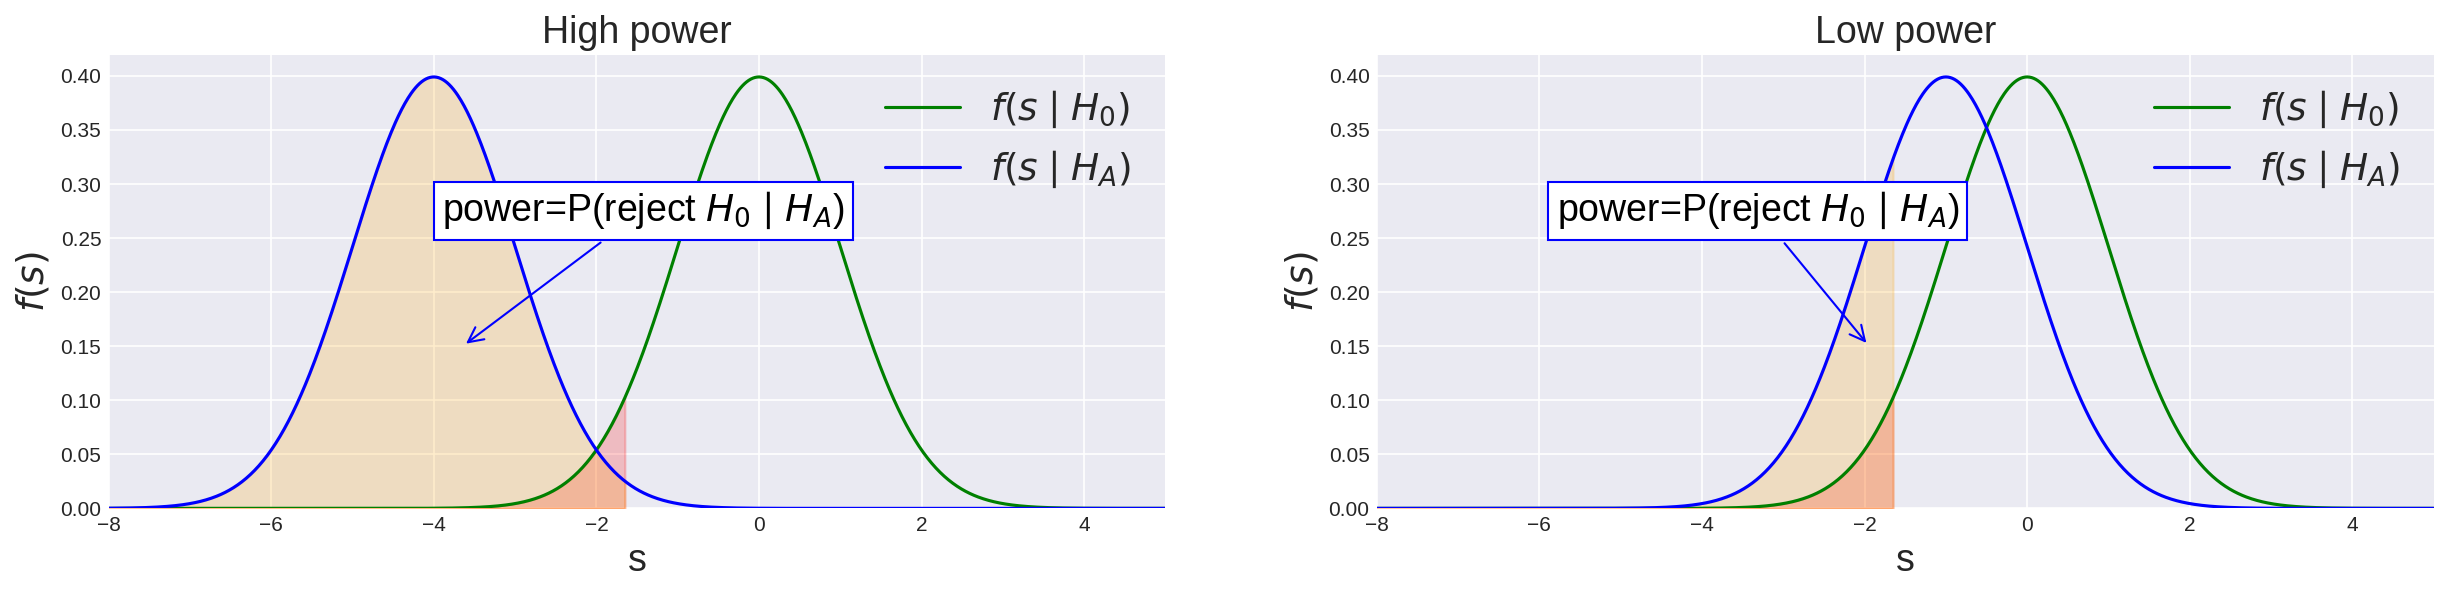

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4), dpi=150) 
xmin = -8
xmax = 5
x = np.linspace(xmin, xmax, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


p1 = 0.05
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)


axes[0].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="red", alpha=0.2)

axes[0].plot(x, pdf, c="green", label=r"$f(s\mid H_0)$")


pdf_A = stats.norm.pdf(x, -4, 1)
axes[0].fill_between(x[(x<=q1)], 
                     pdf_A[(x<=q1)], 
                     color="orange", alpha=0.2)

axes[0].plot(x, pdf_A, c="blue", label=r"$f(s\mid H_A)$")

axes[0].set_title("High power", fontsize=18)
axes[0].set_xlabel("s", fontsize=18);
axes[0].set_ylabel(r"$f(s)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].legend(fontsize=18)
axes[0].annotate(r"power=P(reject $H_0\mid H_A$)", (q1-2, 0.15), 
            xytext=(-10, 60), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))


axes[1].fill_between(x[(x<=q1)], 
                     pdf[(x<=q1)], 
                     color="red", alpha=0.2)

axes[1].plot(x, pdf, c="green", label=r"$f(s\mid H_0)$")
pdf_A = stats.norm.pdf(x, -1, 1)
axes[1].fill_between(x[(x<=q1)], 
                     pdf_A[(x<=q1)], 
                     color="orange", alpha=0.2)

axes[1].plot(x, pdf_A, c="blue", label=r"$f(s\mid H_A)$")

axes[1].set_title("Low power", fontsize=18)
axes[1].set_xlabel("s", fontsize=18);
axes[1].set_ylabel(r"$f(s)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
axes[1].legend(fontsize=18)
axes[1].annotate(r"power=P(reject $H_0\mid H_A$)", (q1-0.3, 0.15), 
            xytext=(-150, 60), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"));

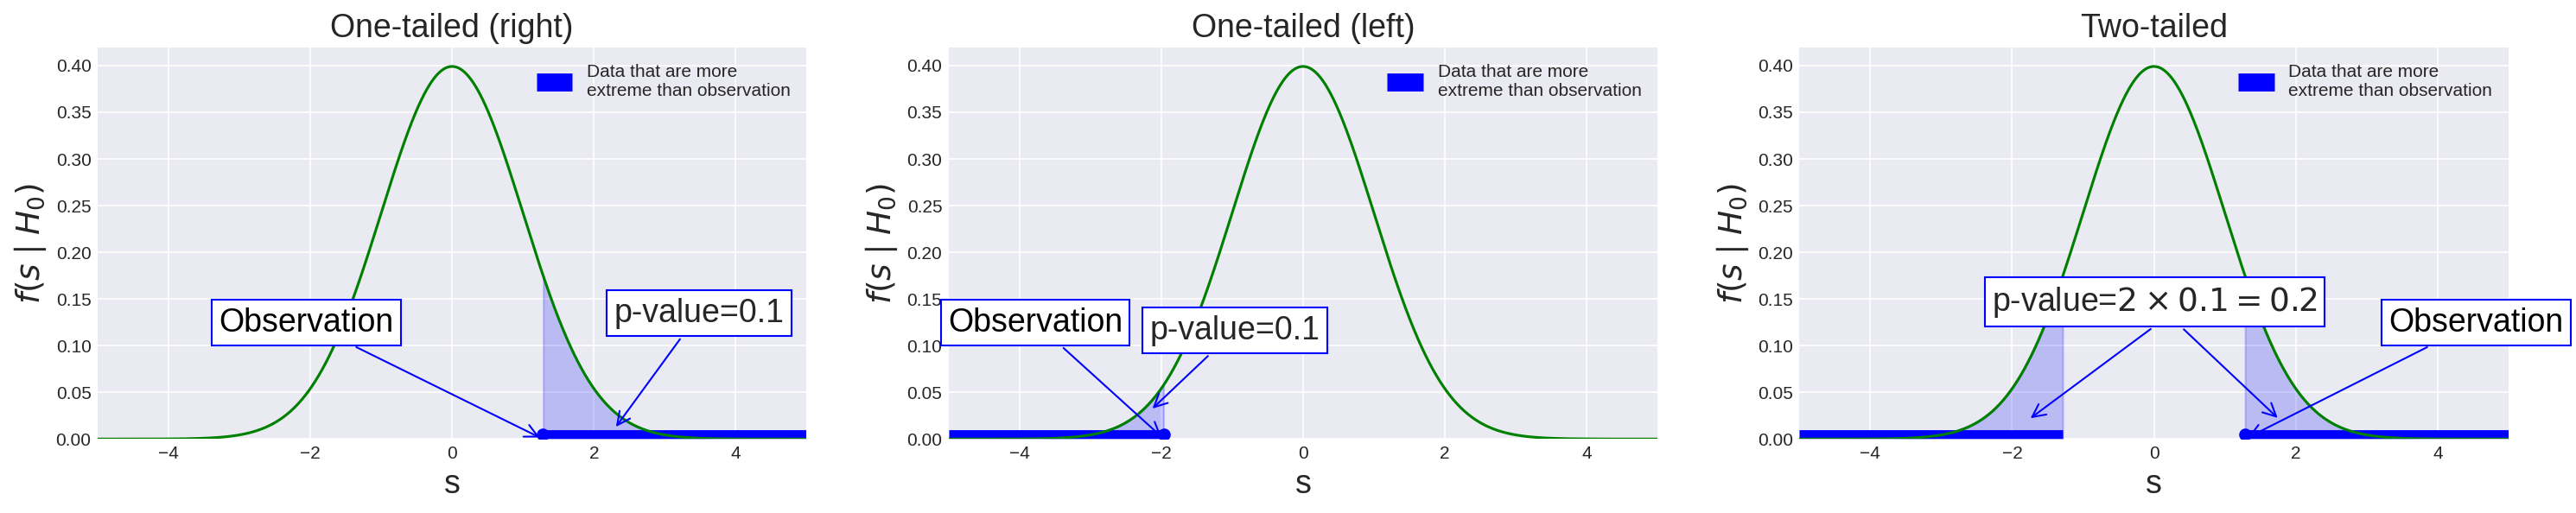

In [7]:
# Gaussian distribution
fig, axes = plt.subplots(1, 3, figsize=(24, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


p1 = 0.9
pe = 1 - p1
cl = p1
q1 = stats.norm.ppf(p1, 0, 1)

axes[0].scatter(q1, 0.005, c="blue")

axes[0].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="blue", alpha=0.2)

axes[0].annotate("p-value=0.1", (q1+1, 0.01), 
                 xytext=(0, 60), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].hlines(0, q1, xmax, color="blue", linewidth=10, label="Data that are more\nextreme than observation")
axes[0].annotate("Observation", (q1, 0), 
            xytext=(-180, 60), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].plot(x, pdf, c="green")
axes[0].set_title("One-tailed (right)", fontsize=18)
axes[0].set_xlabel("s", fontsize=18);
axes[0].set_ylabel(r"$f(s\mid H_0)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].legend()

axes[1].scatter(q0, 0.005, c="blue")

axes[1].fill_between(x[(x<=q0)], 
                     pdf[(x<=q0)], 
                     color="blue", alpha=0.2)

axes[1].annotate("p-value=0.1", (q0-0.2, 0.03), 
                 xytext=(0, 40), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[1].hlines(0, xmin, q0, color="blue", linewidth=10, label="Data that are more\nextreme than observation")
axes[1].annotate("Observation", (q0, 0), 
            xytext=(-120, 60), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[1].plot(x, pdf, c="green")
axes[1].set_title("One-tailed (left)", fontsize=18)
axes[1].set_xlabel("s", fontsize=18);
axes[1].set_ylabel(r"$f(s\mid H_0)$", fontsize=18);
axes[1].set_ylim(0)
axes[1].set_xlim(xmin, xmax)
axes[1].legend()

p0 = 0.1
p1 = 0.9
cl = 1-2*p0
q0 = stats.norm.ppf(p0, 0, 1)
q1 = stats.norm.ppf(p1, 0, 1)
axes[2].scatter(q1, 0.005, c="blue")
axes[2].fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="blue", alpha=0.2)
axes[2].fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="blue", alpha=0.2)

axes[2].annotate("Observation", (q1, 0), 
            xytext=(80, 60), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))


axes[2].annotate(r"p-value=$2\times0.1=0.2$", (q1+0.5, 0.02), 
                 xytext=(-160, 61), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[2].annotate("", (q0-0.5, 0.02), 
                 xytext=(70, 52), 
                 textcoords="offset points", 
                 arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18)
axes[2].plot(x, pdf, c="green")
axes[2].set_title("Two-tailed", fontsize=18)
axes[2].set_xlabel("s", fontsize=18)
axes[2].hlines(0, q1, xmax, color="blue", linewidth=10, label="Data that are more\nextreme than observation")
axes[2].hlines(0, xmin, q0, color="blue", linewidth=10)
axes[2].set_xlim(xmin, xmax)
axes[2].set_ylabel(r"$f(s\mid H_0)$", fontsize=18)
axes[2].legend()
axes[2].set_ylim(0);


z 3.333333333333329
One-tailed 0.0004290603331968956
Two-tailed 0.0008581206663937913


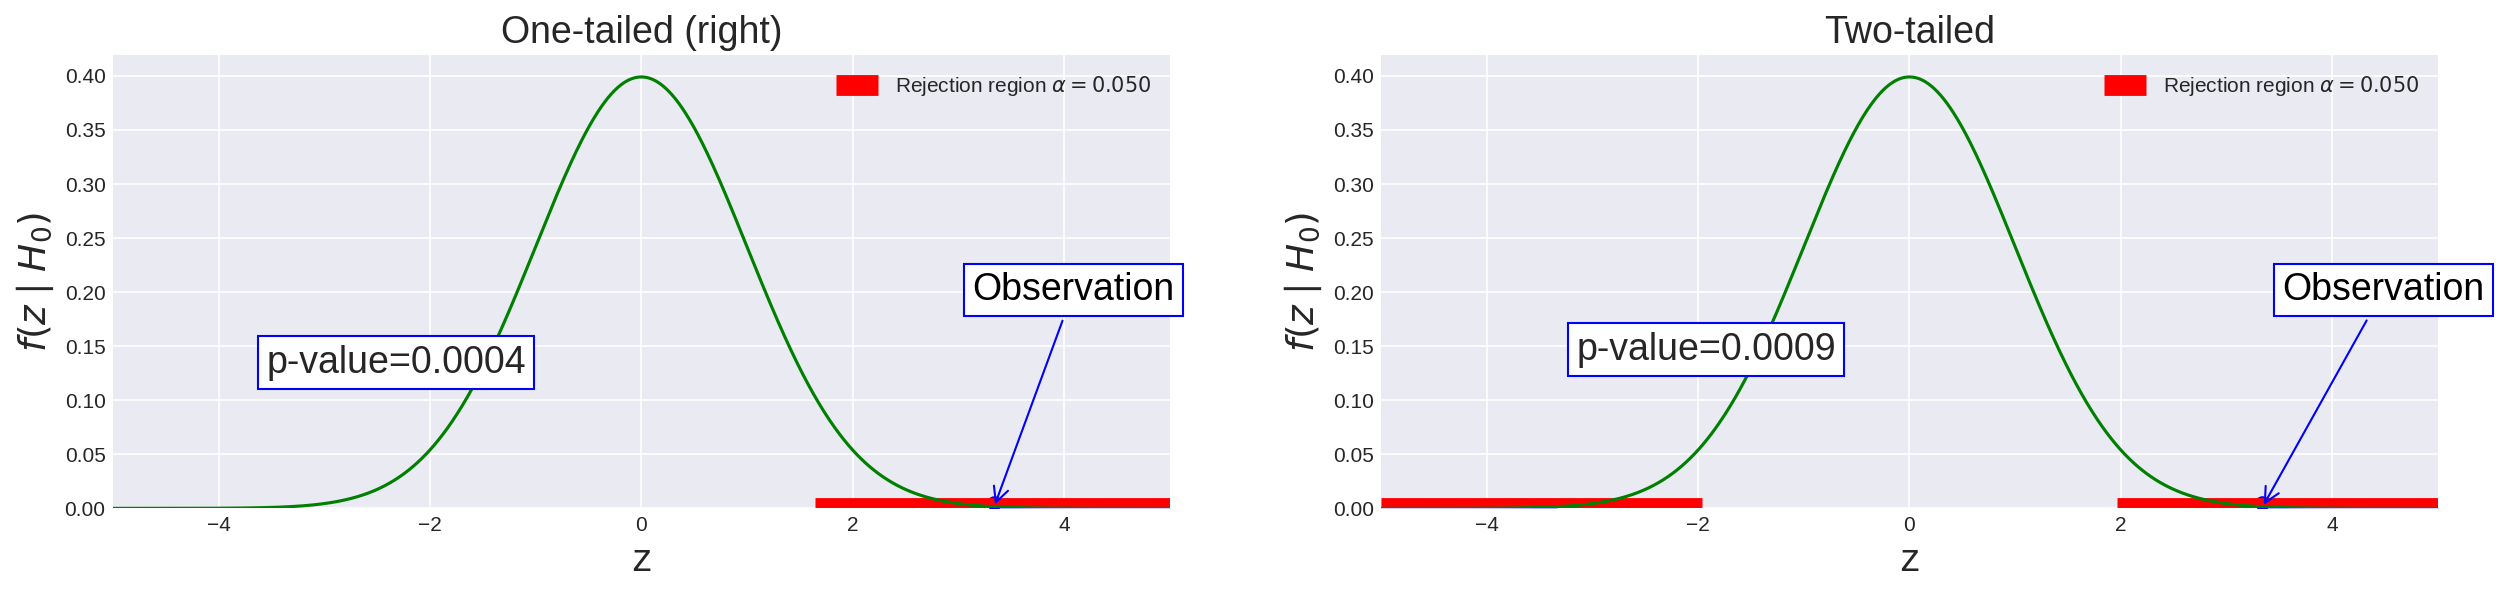

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4), dpi=150) 
xmin = -5
xmax = 5
x = np.linspace(-5, 5, num=1000)
pdf = stats.norm.pdf(x, 0, 1)


x_bar = 2.3
N = 100
observation = (x_bar-2.1)/(0.6/math.sqrt(N))

p0 = 1-stats.norm.cdf(observation, 0, 1)
p1 = 2*(1-stats.norm.cdf(observation, 0, 1))


q1 = observation
q0 = -observation

alpha = 0.05
reject0 = stats.norm.ppf(1-alpha, 0, 1)
reject1 = stats.norm.ppf(alpha, 0, 1)
reject20 = stats.norm.ppf(alpha/2, 0, 1)
reject21 = stats.norm.ppf(1-alpha/2, 0, 1)

axes[0].scatter(q1, 0.005, c="blue")

axes[0].fill_between(x[(x>=q1)], 
                     pdf[(x>=q1)], 
                     color="blue", alpha=0.2)

axes[0].annotate("p-value=%.4f"%p0, (0, 0.01), 
                 xytext=(-180, 60), 
                 textcoords="offset points", fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].hlines(0, reject0, xmax, color="red", linewidth=10, label=r"Rejection region $\alpha=%.3f$"%alpha)
axes[0].annotate("Observation", (q1, 0), 
            xytext=(-10, 100), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))
axes[0].plot(x, pdf, c="green")
axes[0].set_title("One-tailed (right)", fontsize=18)
axes[0].set_xlabel("z", fontsize=18);
axes[0].set_ylabel(r"$f(z\mid H_0)$", fontsize=18);
axes[0].set_ylim(0)
axes[0].set_xlim(xmin, xmax)
axes[0].legend()


axes[1].scatter(q1, 0.005, c="blue")
axes[1].fill_between(x[(x<=q0)], 
                    pdf[(x<=q0)], 
                    color="blue", alpha=0.2)
axes[1].fill_between(x[(x>=q1)], 
                    pdf[(x>=q1)], 
                    color="blue", alpha=0.2)

axes[1].annotate("Observation", (q1, 0), 
            xytext=(10, 100), 
            textcoords="offset points", 
            color="k",
            arrowprops={"arrowstyle":"->", "color":"blue"}, fontsize=18, 
            bbox=dict(edgecolor="blue", facecolor="white"))


axes[1].annotate(r"p-value=%.4f"%(2*p0), (0, 0.02), 
                 xytext=(-160, 61), 
                 textcoords="offset points", fontsize=18, 
                 bbox=dict(edgecolor="blue", facecolor="white"))
axes[1].plot(x, pdf, c="green")
axes[1].set_title("Two-tailed", fontsize=18)
axes[1].set_xlabel("z", fontsize=18)
axes[1].hlines(0, reject21, xmax, color="red", linewidth=10, label=r"Rejection region $\alpha=%.3f$"%alpha)
axes[1].hlines(0, xmin, reject20, color="red", linewidth=10)
axes[1].set_xlim(xmin, xmax)
axes[1].set_ylabel(r"$f(z\mid H_0)$", fontsize=18)

axes[1].set_ylim(0)
axes[1].legend()


print("z", observation)
print("One-tailed", p0)
print("Two-tailed", p1)